**EFECTO DEL MARKETING EN LOS HÁBITOS DE CONSUMO DE ADULTOS**


.



MEDINA GASCA, SWIETENIA NAOMI, ID: 00486352

CARLOS IRVING BECERRIL VILLAVERDE, ID: 00235237

BARONA TOVAR, BENJAMIN, ID: 00491857


1. CARGAR DATOS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("jackdaoud/marketing-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/marketing-data


In [ ]:
#manipular el archivo descargado
df=pd.read_csv(path+"/ifood_df.csv")
#este metodo es para imprimir los primeros 5 registros
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


2. TRANSFORMAR

In [ ]:
#Obtener información del DT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
#revisar si existen datos nulos
df.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
df['Basic_Education'] = df['education_2n Cycle'] + df['education_Basic']
df['education_Advanced'] = df['education_Graduation'] + df['education_Master'] + df['education_PhD']

In [ ]:
df = df.drop(columns=['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'])
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,MntTotal,MntRegularProds,AcceptedCmpOverall,education_Advanced,Basic_Education
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,1,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,1,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,734,692,0,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,48,43,0,1,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,1,0,0,0,407,392,0,1,0


In [ ]:
#cargar datos
marketing = df[['ID', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
                       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
                       'Z_Revenue', 'Response', 'Basic_Education', 'education_Advanced']]

# exportar
marketing.to_csv('ventas_clientes_2000.csv', index=False)

print("datos exportados correctamente")


**VISUALIZACIÓN DE DATOS**

DISTRIBUCIÓN DE EDAD

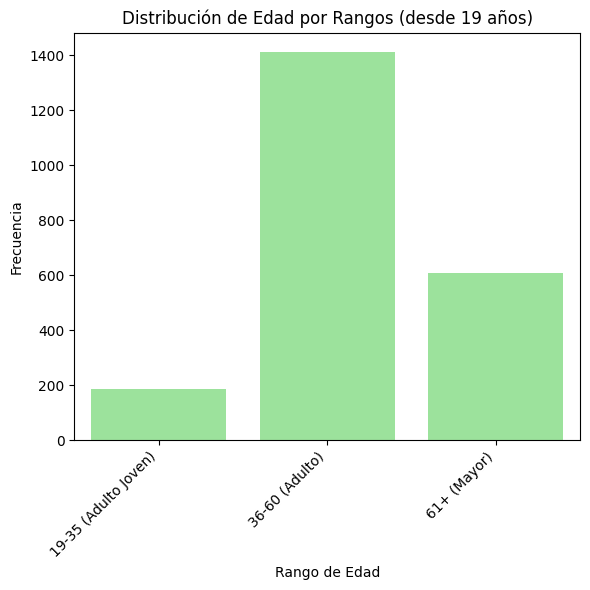

In [ ]:
#rangos de edad
#no hay datos de personas con menos de 19 años
bins = [19, 35, 60, np.inf]
labels = ['19-35 (Adulto Joven)', '36-60 (Adulto)', '61+ (Mayor)']

df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(6, 6))
sns.countplot(x='Age_Range', data=df, color='lightgreen', order=labels)
plt.title('Distribución de Edad por Rangos (desde 19 años)')
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


PROPORCION DE CLIENTES POR ESTADO MARITAL

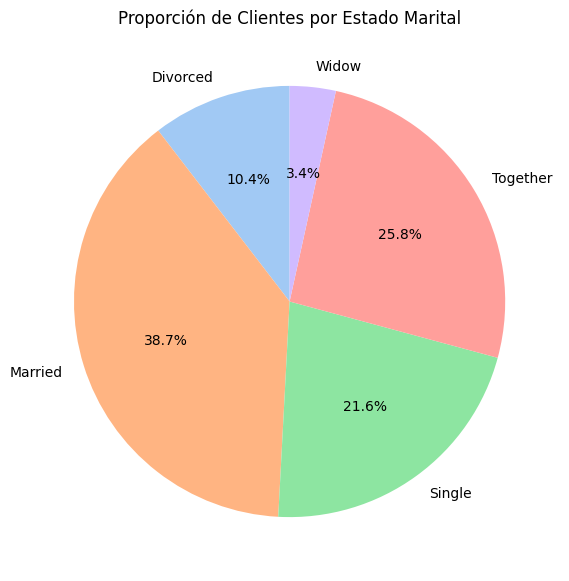

In [ ]:
marital_status_counts = {}
if 'marital_Divorced' in df.columns:
    marital_status_counts['Divorced'] = df['marital_Divorced'].sum()
if 'marital_Married' in df.columns:
    marital_status_counts['Married'] = df['marital_Married'].sum()
if 'marital_Single' in df.columns:
    marital_status_counts['Single'] = df['marital_Single'].sum()
if 'marital_Together' in df.columns:
    marital_status_counts['Together'] = df['marital_Together'].sum()
if 'marital_Widow' in df.columns:
    marital_status_counts['Widow'] = df['marital_Widow'].sum()

marital_series = pd.Series(marital_status_counts)

plt.figure(figsize=(7, 7))
marital_series.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proporción de Clientes por Estado Marital')
plt.ylabel('')
plt.show()

Correlación entre Aceptación de Campañas y Variables Numéricas

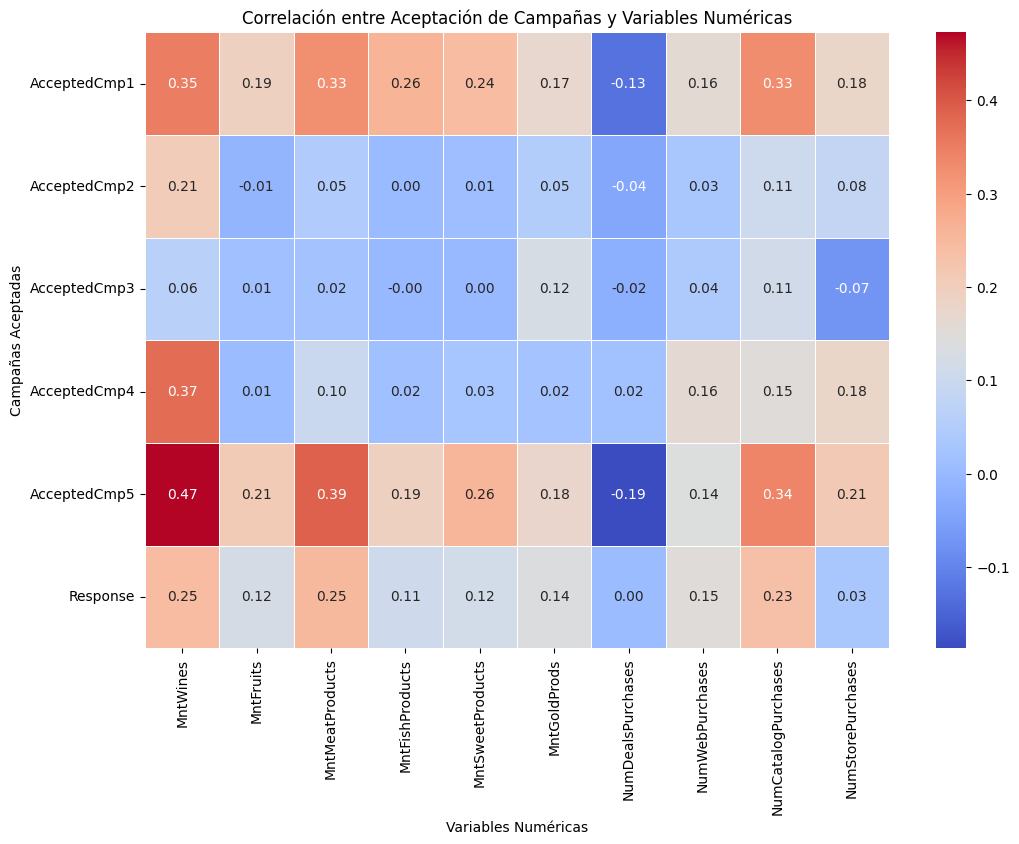

In [40]:
accepted_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
numeric_cols = [
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

cols_to_analyze = accepted_cols + numeric_cols

df_corr = df[cols_to_analyze].copy()

correlation_matrix = df_corr.corr()

correlation_accepted_vs_numeric = correlation_matrix.loc[accepted_cols, numeric_cols]

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_accepted_vs_numeric, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlación entre Aceptación de Campañas y Variables Numéricas')
plt.xlabel('Variables Numéricas')
plt.ylabel('Campañas Aceptadas')
plt.show()

**SITUACIONES DE ANÁLISIS**

1. ¿Cuál es el ingreso promedio de los ecuestados?

In [ ]:
ingreso_promedio = df['Income'].mean()
print(f'El ingreso promedio de los clientes es: ${ingreso_promedio:.2f}')


El ingreso promedio de los clientes es: $51622.09


2. ¿Cuál es el número total de compras realizadas a través de la web, catálogo y tienda física?

In [ ]:
total_compras_web = df['NumWebPurchases'].sum()
total_compras_catalogo = df['NumCatalogPurchases'].sum()
total_compras_tienda = df['NumStorePurchases'].sum()

print(f'Total de compras por web: {total_compras_web}')
print(f'Total de compras por catálogo: {total_compras_catalogo}')
print(f'Total de compras en tienda: {total_compras_tienda}')

Total de compras por web: 9042
Total de compras por catálogo: 5833
Total de compras en tienda: 12841


3. ¿Cuál es el promedio de días desde la última compra (Recency) de los clientes?

In [39]:
recencia_promedio = df['Recency'].mean()
print(f'El promedio de días desde la última compra es: {recencia_promedio:.2f} días')


El promedio de días desde la última compra es: 49.01 días
